In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
# Load Dataset
data = pd.read_csv("Company_data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Data preprocessing

In [6]:
data[data.duplicated()].shape

(0, 11)

In [7]:
df = pd.get_dummies(data,columns=['Urban','US'],drop_first=True)

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [10]:
X = df.drop('ShelveLoc',axis=1)
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [11]:
cols = list(X.columns)
cols

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
X.loc[:,['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']] = sc.fit_transform(X.loc[:,['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']])

In [14]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,0.710376,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0.646869,0.741881
1,1.320179,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,0.646869,0.741881
2,0.908917,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,0.646869,0.741881
3,-0.034151,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,0.646869,0.741881
4,-1.186395,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,1.798804,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,0.646869,0.741881
396,-0.480867,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,-1.545908,0.741881
397,-0.030605,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,0.646869,0.741881
398,-0.551774,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,0.646869,0.741881


In [15]:
Y = df['ShelveLoc']
Y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [16]:
df['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [18]:
colnames = list(df.columns)

In [19]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

# Train Test Split

In [20]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=40)

# Building Decision Tree Classifier Using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

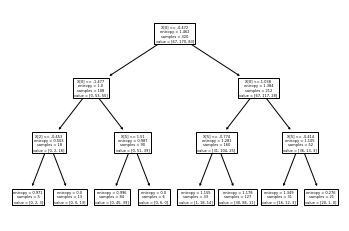

In [22]:
tree.plot_tree(model);

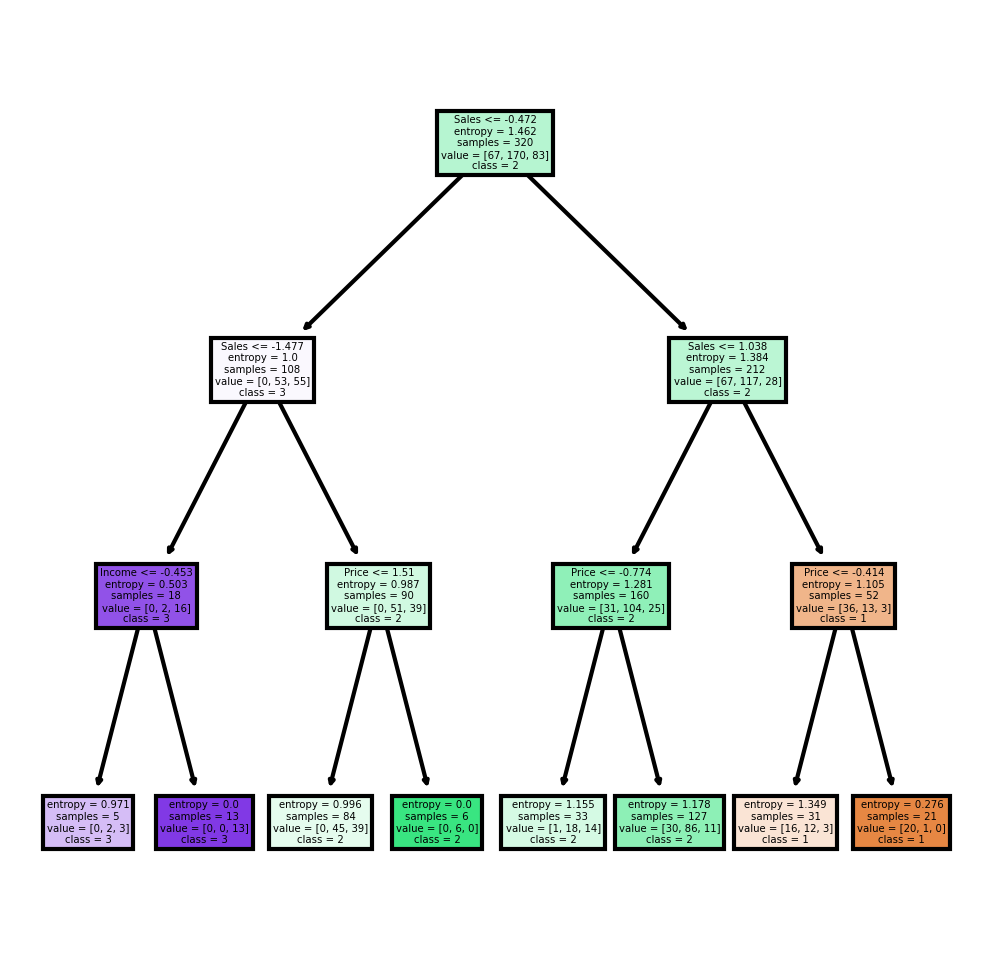

In [23]:
fn =['Sales','CompPrice','Income','Advertising','Population','Price', 'Age','Education','Urban_Yes','US_Yes']
cn =['1', '2', '3']
fig, axes = plt.subplots(nrows =1,ncols =1, figsize = (4,4), dpi = 300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [24]:
# predicting on test data
pred = model.predict(X_test)
pd.Series(pred).value_counts()

2    63
1    13
3     4
dtype: int64

In [25]:
pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [26]:
pd.crosstab(Y_test,pred)

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [27]:
# Accuracy
np.mean(pred==Y_test)


0.625

# Building Decision Tree Classifier (CART) using Gini Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(pred==Y_test)

0.625